In [71]:
import pandas as  pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import string
import random

In [72]:
df=pd.read_csv("Dataset .csv") 
df.head()   

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 3 

# Task 1: Restaurant Reviews

# Analyze the text reviews to identify the most common positive and negative keywords.

In [73]:
# Load the dataset
df = pd.read_csv('Dataset .csv')

In [74]:
# Generate synthetic reviews based on rating
def generate_review(rating):
    positive_phrases = [
        "amazing service", "delicious food", "loved the ambiance", "highly recommend",
        "friendly staff", "excellent experience", "would visit again"
    ]
    neutral_phrases = [
        "average taste", "okay experience", "nothing special", "could be better",
        "decent service", "reasonable price"
    ]
    negative_phrases = [
        "terrible service", "bad food", "very disappointed", "not worth the money",
        "rude staff", "won't come again", "poor hygiene"
    ]

    if rating >= 4:
        return ' '.join(random.choices(positive_phrases, k=random.randint(3, 5)))
    elif rating >= 2.5:
        return ' '.join(random.choices(neutral_phrases, k=random.randint(3, 5)))
    else:
        return ' '.join(random.choices(negative_phrases, k=random.randint(3, 5)))


In [75]:
# Add synthetic review text and calculate review length
df['Review Text'] = df['Aggregate rating'].apply(generate_review)
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

In [76]:
# Average review length
average_length = df['Review Length'].mean()
print(f"Average review length: {average_length:.2f} words")

Average review length: 9.01 words


In [77]:
# Correlation and scatter plot
print("\nCorrelation between review length and rating:")
print(df[['Aggregate rating', 'Review Length']].corr())



Correlation between review length and rating:
                  Aggregate rating  Review Length
Aggregate rating          1.000000      -0.151152
Review Length            -0.151152       1.000000


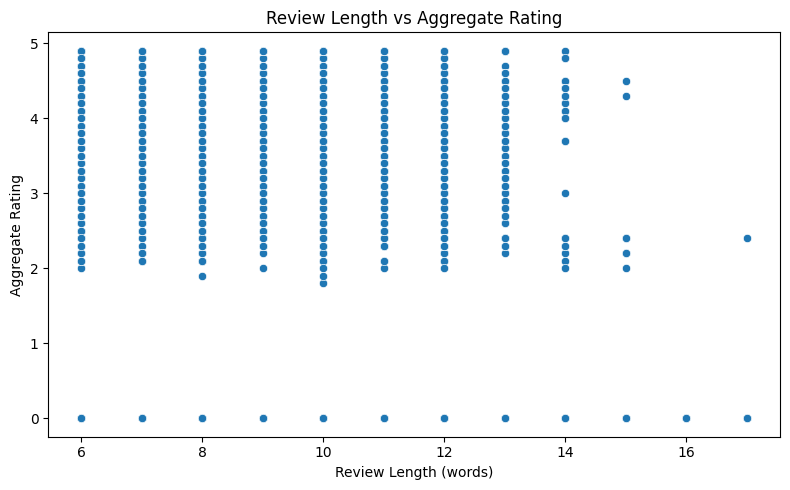

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Review Length', y='Aggregate rating')
plt.title("Review Length vs Aggregate Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.show()

# Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [79]:
def clean_text(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

In [98]:
# Split positive and negative reviews
positive_reviews = df[df['Aggregate rating'] >= 4]['Review Text'].apply(clean_text).str.split().sum()
negative_reviews = df[df['Aggregate rating'] < 2.5]['Review Text'].apply(clean_text).str.split().sum()


In [99]:
# Count keywords
positive_freq = Counter(positive_reviews)
negative_freq = Counter(negative_reviews)

In [100]:
print("\nMost common positive keywords:")
print(positive_freq.most_common(10))

print("\nMost common negative keywords:")
print(negative_freq.most_common(10))


Most common positive keywords:
[('loved', 865), ('the', 865), ('ambiance', 865), ('highly', 791), ('recommend', 791), ('excellent', 791), ('experience', 791), ('friendly', 770), ('staff', 770), ('amazing', 766)]

Most common negative keywords:
[('poor', 1352), ('hygiene', 1352), ('wont', 1331), ('come', 1331), ('again', 1331), ('rude', 1331), ('staff', 1331), ('very', 1331), ('disappointed', 1331), ('not', 1331)]


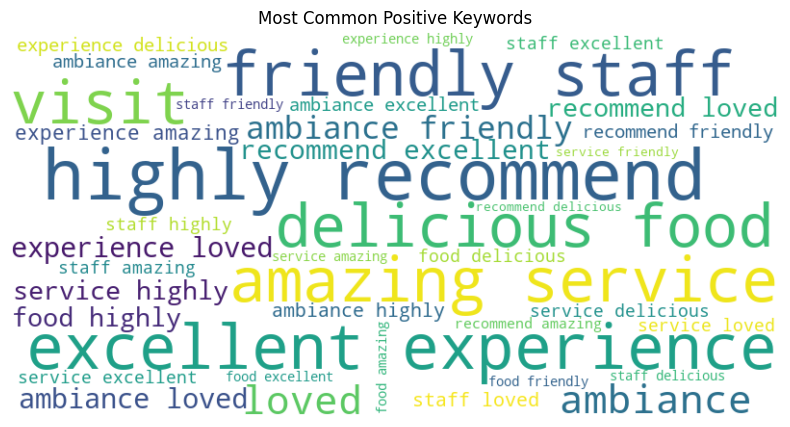

In [101]:
# Word cloud for positive keywords
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Positive Keywords")
plt.show()

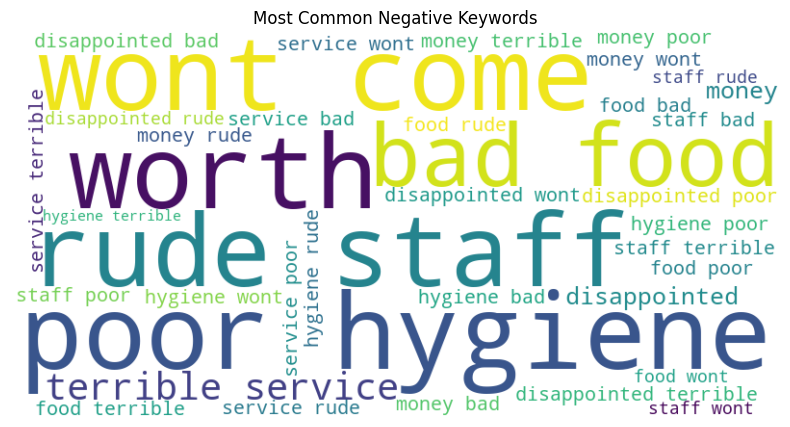

In [102]:
# Word cloud for negative keywords
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Negative Keywords")
plt.show()

# Task 2: Votes Analysis

# Identify the restaurants with the highest andl owest number of votes.

In [81]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df_votes = df.dropna(subset=['Votes'])

In [82]:
max_votes = df_votes['Votes'].max()
highest_votes_restaurants = df_votes[df_votes['Votes'] == max_votes][['Restaurant Name', 'Votes']]

In [83]:
min_votes = df_votes['Votes'].min()
lowest_votes_restaurants = df_votes[df_votes['Votes'] == min_votes][['Restaurant Name', 'Votes']]

In [84]:
print("Restaurant(s) with Highest Votes:")
print(highest_votes_restaurants)

Restaurant(s) with Highest Votes:
    Restaurant Name  Votes
728            Toit  10934


In [85]:
print("\nRestaurant(s) with Lowest Votes:")
print(lowest_votes_restaurants)


Restaurant(s) with Lowest Votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


# Analyze if there is a correlation between the number of votes and the rating of a restaurant

In [86]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

In [87]:
df_clean = df.dropna(subset=['Votes', 'Aggregate rating'])
correlation = df_clean['Votes'].corr(df_clean['Aggregate rating'])

In [88]:
print(f"Correlation between number of votes and aggregate rating: {correlation:.2f}")

Correlation between number of votes and aggregate rating: 0.31


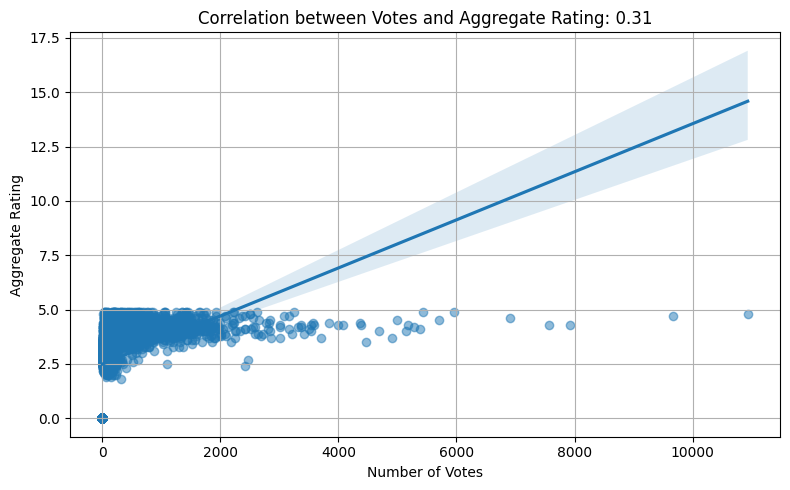

In [89]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Votes', y='Aggregate rating', data=df_clean, scatter_kws={'alpha':0.5})
plt.title(f'Correlation between Votes and Aggregate Rating: {correlation:.2f}')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3: Price Range vs. Online Delivery and Table Booking

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [90]:
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Has Online delivery'] = df['Has Online delivery'].astype(str)
df['Has Table booking'] = df['Has Table booking'].astype(str)

In [91]:
online_delivery_summary = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
table_booking_summary = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0) * 100

<Figure size 800x500 with 0 Axes>

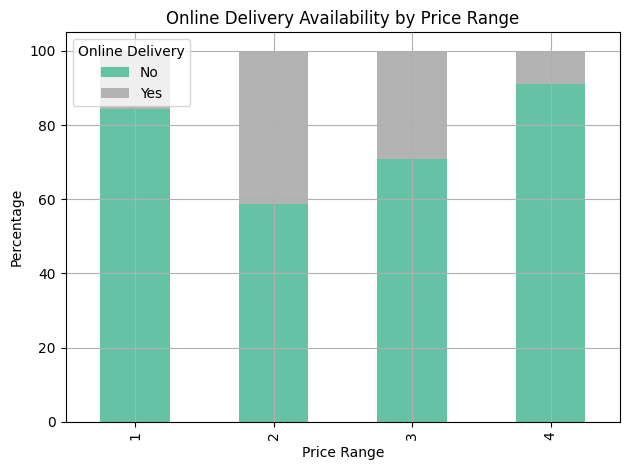

In [92]:
plt.figure(figsize=(8, 5))
online_delivery_summary.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Online Delivery")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

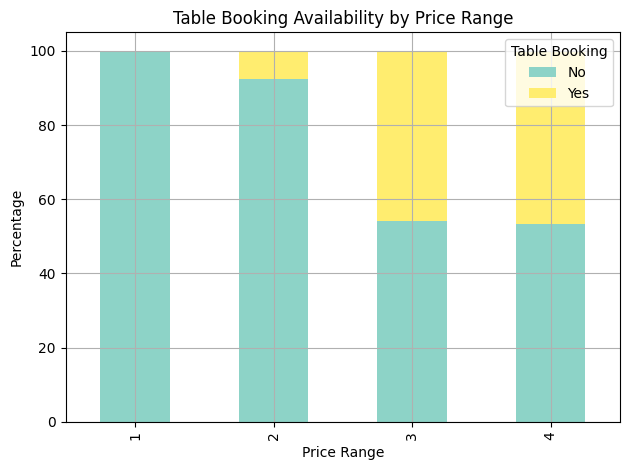

In [93]:
plt.figure(figsize=(8, 5))
table_booking_summary.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Table Booking Availability by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Table Booking")
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine if higher-priced restaurants aremore likely to offer these services.

In [94]:
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Has Online delivery'] = df['Has Online delivery'].astype(str)
df['Has Table booking'] = df['Has Table booking'].astype(str)

In [95]:
online_delivery_rate = df[df['Has Online delivery'] == 'Yes'].groupby('Price range').size() / df.groupby('Price range').size()
table_booking_rate = df[df['Has Table booking'] == 'Yes'].groupby('Price range').size() / df.groupby('Price range').size()

In [96]:
service_availability = pd.DataFrame({
    'Online Delivery Rate': online_delivery_rate,
    'Table Booking Rate': table_booking_rate
}).fillna(0)

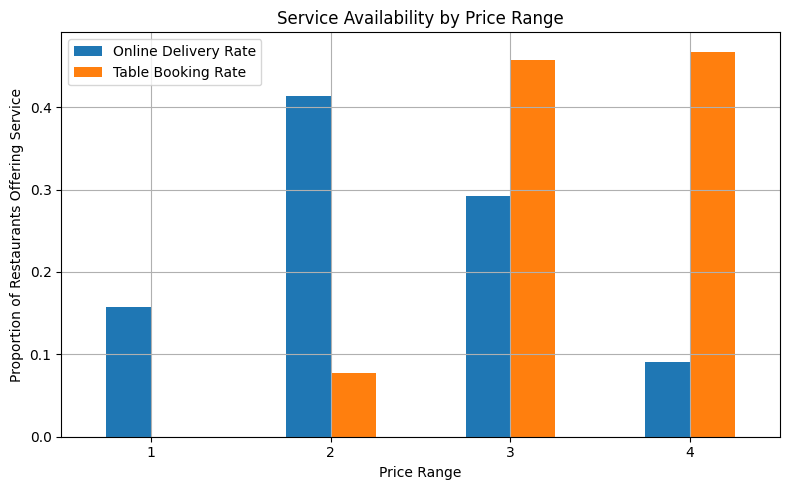

In [97]:
service_availability.plot(kind='bar', figsize=(8, 5))
plt.title("Service Availability by Price Range")
plt.ylabel("Proportion of Restaurants Offering Service")
plt.xlabel("Price Range")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()